In [1]:
from sympy import *
init_printing()

In [2]:
x0, y0, theta0, v0 = symbols(['x_0', 'y_0', '\Theta_0', 'v_0'])
d_1, a_1, d_2, a_2, d_3, a_3, d_4, a_4, d_5, a_5 = symbols('\delta_1 a_1 \delta_2 a_2 \delta_3 a_3 \delta_4 a_4 \delta_5 a_5')
U1 = Matrix([d_1, a_1])
U2 = Matrix([d_2, a_2])
U3 = Matrix([d_3, a_3])
U4 = Matrix([d_4, a_4])
U5 = Matrix([d_5, a_5])
L = symbols('L')
dt = symbols('t_d')

In [21]:
def dynamics(X,U):
    _X, _Y, _THETA, _V = 0, 1, 2, 3
    _STEER, _ACCEL = 0, 1
    dx = Matrix([
        (X[_V]+(L/2))*cos(X[_THETA]),
        (X[_V]+(L/2))*sin(X[_THETA]),
        (X[_V]*(tan(U[_STEER])/L)),
        U[_ACCEL]
    ])
    return dx
def cdynamics(X,U):
    _X, _Y, _THETA, _V = 0, 1, 2, 3
    _STEER, _ACCEL = 0, 1
    dx = Matrix([
        (X[_V]+(L/2))*cos(X[_THETA]),
        (X[_V]+(L/2))*sin(X[_THETA]),
        (X[_V]*(U[_STEER]+(U[_STEER]**3/3))/L),
        U[_ACCEL]
    ])
    return dx

First, we consider the single step gradient, with respect to our control input

In [22]:
X0 = Matrix([x0, y0, theta0, v0])
X0

⎡  x₀   ⎤
⎢       ⎥
⎢  y₀   ⎥
⎢       ⎥
⎢\Theta₀⎥
⎢       ⎥
⎣  v₀   ⎦

In [23]:
X1 = X0 + dt*dynamics(X0, U1)
X1

⎡    ⎛L     ⎞                  ⎤
⎢t_d⋅⎜─ + v₀⎟⋅cos(\Theta₀) + x₀⎥
⎢    ⎝2     ⎠                  ⎥
⎢                              ⎥
⎢    ⎛L     ⎞                  ⎥
⎢t_d⋅⎜─ + v₀⎟⋅sin(\Theta₀) + y₀⎥
⎢    ⎝2     ⎠                  ⎥
⎢                              ⎥
⎢          t_d⋅v₀⋅tan(\delta₁) ⎥
⎢\Theta₀ + ─────────────────── ⎥
⎢                   L          ⎥
⎢                              ⎥
⎣         a₁⋅t_d + v₀          ⎦

In [24]:
X2 = X1 + dt*dynamics(X1, U2)
X2

⎡    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞     ⎤
⎢t_d⋅⎜─ + v₀⎟⋅cos(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅cos⎜\Theta₀ + ───────────────────⎟ + x₀⎥
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠     ⎥
⎢                                                                                         ⎥
⎢    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞     ⎥
⎢t_d⋅⎜─ + v₀⎟⋅sin(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅sin⎜\Theta₀ + ───────────────────⎟ + y₀⎥
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠     ⎥
⎢                                                                                         ⎥
⎢                       t_d⋅v₀⋅tan(\delta₁)   t_d⋅(a₁⋅t_d + v₀)⋅tan(\delta₂)              ⎥
⎢             \Theta₀ + ─────────────────── + ──────────────────────────────              ⎥
⎢                                L                          L                   

In [25]:
X3 = X2 + dt*dynamics(X2, U3)
X3

⎡    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞       ⎛L                       ⎞    ⎛          t_d⋅v₀⋅
⎢t_d⋅⎜─ + v₀⎟⋅cos(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅cos⎜\Theta₀ + ───────────────────⎟ + t_d⋅⎜─ + a₁⋅t_d + a₂⋅t_d + v₀⎟⋅cos⎜\Theta₀ + ───────
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠       ⎝2                       ⎠    ⎝                 
⎢                                                                                                                                           
⎢    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞       ⎛L                       ⎞    ⎛          t_d⋅v₀⋅
⎢t_d⋅⎜─ + v₀⎟⋅sin(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅sin⎜\Theta₀ + ───────────────────⎟ + t_d⋅⎜─ + a₁⋅t_d + a₂⋅t_d + v₀⎟⋅sin⎜\Theta₀ + ───────
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠       ⎝2                       ⎠    ⎝                 
⎢            

In [26]:
X4 = X3 + dt*dynamics(X3, U4)
X4

⎡    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞       ⎛L                       ⎞    ⎛          t_d⋅v₀⋅
⎢t_d⋅⎜─ + v₀⎟⋅cos(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅cos⎜\Theta₀ + ───────────────────⎟ + t_d⋅⎜─ + a₁⋅t_d + a₂⋅t_d + v₀⎟⋅cos⎜\Theta₀ + ───────
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠       ⎝2                       ⎠    ⎝                 
⎢                                                                                                                                           
⎢    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞       ⎛L                       ⎞    ⎛          t_d⋅v₀⋅
⎢t_d⋅⎜─ + v₀⎟⋅sin(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅sin⎜\Theta₀ + ───────────────────⎟ + t_d⋅⎜─ + a₁⋅t_d + a₂⋅t_d + v₀⎟⋅sin⎜\Theta₀ + ───────
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠       ⎝2                       ⎠    ⎝                 
⎢            

In [27]:
X5 = X4 + dt*dynamics(X4, U5)
X5

⎡    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞       ⎛L                       ⎞    ⎛          t_d⋅v₀⋅
⎢t_d⋅⎜─ + v₀⎟⋅cos(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅cos⎜\Theta₀ + ───────────────────⎟ + t_d⋅⎜─ + a₁⋅t_d + a₂⋅t_d + v₀⎟⋅cos⎜\Theta₀ + ───────
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠       ⎝2                       ⎠    ⎝                 
⎢                                                                                                                                           
⎢    ⎛L     ⎞                    ⎛L              ⎞    ⎛          t_d⋅v₀⋅tan(\delta₁)⎞       ⎛L                       ⎞    ⎛          t_d⋅v₀⋅
⎢t_d⋅⎜─ + v₀⎟⋅sin(\Theta₀) + t_d⋅⎜─ + a₁⋅t_d + v₀⎟⋅sin⎜\Theta₀ + ───────────────────⎟ + t_d⋅⎜─ + a₁⋅t_d + a₂⋅t_d + v₀⎟⋅sin⎜\Theta₀ + ───────
⎢    ⎝2     ⎠                    ⎝2              ⎠    ⎝                   L         ⎠       ⎝2                       ⎠    ⎝                 
⎢            

In [28]:
diff(X5[0], d_1)

In [29]:
X2[1]

In [30]:
diff(X2[1], d_1)

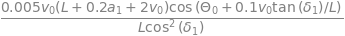

In [31]:
simplify(diff(X2[1], d_1).subs([(dt, 0.1)]))

In [32]:
diff(X2[1], a_1)

In [33]:
diff(X2[1], a_1).subs([(dt, 0.1)])

In [34]:
diff(X3[1], a_1).subs([(dt, 0.1)])

In [35]:
diff(X2[1], d_1)

In [ ]:
XT = X0 + dt*dynamics(X0, U1)
XT

In [37]:
integrate(dynamics(X0, U1), dt)

⎡    ⎛L     ⎞             ⎤
⎢t_d⋅⎜─ + v₀⎟⋅cos(\Theta₀)⎥
⎢    ⎝2     ⎠             ⎥
⎢                         ⎥
⎢    ⎛L     ⎞             ⎥
⎢t_d⋅⎜─ + v₀⎟⋅sin(\Theta₀)⎥
⎢    ⎝2     ⎠             ⎥
⎢                         ⎥
⎢   t_d⋅v₀⋅tan(\delta₁)   ⎥
⎢   ───────────────────   ⎥
⎢            L            ⎥
⎢                         ⎥
⎣         a₁⋅t_d          ⎦

In [40]:
def dx(t):
    return (v(t)+(L/2))*cos(theta(t))

def dy(t):
    return (v(t)+(L/2))*sin(theta(t))

def dtheta(t, steer):
    return (v(t)*(tan(steer)/L))

def dv(t, accel):
    return accel